In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.datasets import fetch_openml

2023-06-05 22:18:45.746166: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 22:18:45.792710: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 22:18:45.793436: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 22:18:46.630922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mnist = fetch_openml(name = 'mnist_784')

/home/haseeb/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = pd.DataFrame(data=mnist.data, columns= mnist.feature_names)
y = mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
X.loc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
y.loc[0]

'5'

# Ploting Feature against its Lable

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

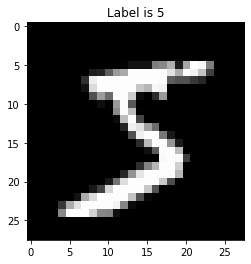

In [8]:
label = y.loc[0]
feature = X.loc[0]
feature = np.array(feature, dtype = 'uint8')
feature = feature.reshape((28,28))
plt.title('Label is {}'.format(label))
plt.imshow(feature,cmap ='gray')
plt.show()

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X,y,random_state = 40, test_size = 0.2)

# Model SGDClassifier

In [10]:
from sklearn.linear_model import SGDClassifier

In [12]:
classifier = SGDClassifier(random_state=42)
# SGDClassifier relies of randomness during training(hence name is 'schotastic') ,set random state helps if want reproducible results 

In [13]:
classifier.fit(X_train,Y_train)

SGDClassifier(random_state=42)

In [14]:
classifier.predict(X_test[:2])

array(['4', '1'], dtype='<U1')

In [15]:
Y_test[:2]

19561    4
54901    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
classifier.score(X_test,Y_test)

0.8743571428571428

# Model RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier

Here in RandomForestClassifier we can pass different parameters such as n_estimators (which if not passed set to be 100)
RandomForestClassifier(n_estimators = 100)

In [18]:
rand_classifier = RandomForestClassifier(n_estimators = 100)
rand_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [19]:
rand_classifier.score(X_test,Y_test)

0.9688571428571429

# Model KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.score(X_test,Y_test)

0.9702857142857143

# Cross Validating Model Performance

In [20]:
from sklearn.model_selection import cross_val_score
#using SGDClassifier
cross_val_score(classifier,X_train,Y_train,cv=3)

array([0.87737719, 0.87223442, 0.87865638])

In [21]:
#using RandomForestClassifier
cross_val_score(rand_classifier,X_train,Y_train,cv=3)

array([0.96598275, 0.96582204, 0.96383799])

For SGDClassifier: 


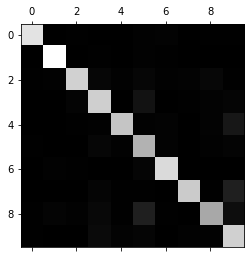

array([[1340,    0,    6,    5,    0,   12,   22,    1,   10,   11],
       [   0, 1510,    5,   11,    1,   17,    6,    5,    5,    3],
       [   7,   15, 1238,   41,   15,   38,   15,   21,   46,    9],
       [   5,    3,   27, 1224,    3,  108,    5,    6,   20,   34],
       [   2,    3,    8,   16, 1163,   13,   20,    5,   21,  137],
       [  10,    5,    5,   38,   14, 1050,   18,    4,   13,   24],
       [   5,   14,    6,    4,    2,   32, 1290,    0,    5,    1],
       [   4,    3,    4,   35,   11,    9,    2, 1199,    7,  183],
       [  10,   27,   13,   50,    6,  188,    7,    2,  996,   82],
       [   7,    1,    4,   59,   22,   30,    0,   17,   13, 1231]])

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print('For SGDClassifier: ')
y_pred_sdg = classifier.predict(X_test)
conf_mx1 = confusion_matrix(Y_test,y_pred_sdg)
plt.matshow(conf_mx1, cmap= plt.cm.gray)
plt.show()
conf_mx1

For RandomForestClassifier: 


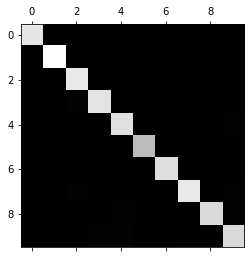

array([[1390,    1,    3,    0,    1,    1,    6,    0,    5,    0],
       [   0, 1543,    2,    4,    3,    1,    2,    4,    2,    2],
       [   5,    2, 1399,    7,    7,    1,    3,    9,   12,    0],
       [   2,    1,   17, 1373,    1,   12,    3,   11,   12,    3],
       [   2,    2,    1,    0, 1352,    0,    7,    2,    5,   17],
       [   3,    2,    2,   12,    2, 1138,   10,    1,    4,    7],
       [   6,    6,    0,    0,    1,    4, 1340,    0,    2,    0],
       [   1,    3,   15,    1,   11,    0,    1, 1408,    1,   16],
       [   2,    5,    9,    9,   15,   11,    2,    1, 1311,   16],
       [   6,    3,    2,   19,   20,    4,    1,   10,    9, 1310]])

In [27]:
print('For RandomForestClassifier: ')
y_pred_rfc = rand_classifier.predict(X_test)
conf_mx2 = confusion_matrix(Y_test,y_pred_rfc)
plt.matshow(conf_mx2, cmap=plt.cm.gray)
plt.show()
conf_mx2

In [28]:
from sklearn.metrics import precision_score, recall_score


precision_micro = precision_score(Y_test, y_pred_sdg, average='micro')
precision_macro = precision_score(Y_test, y_pred_sdg, average='macro')
precision_weighted = precision_score(Y_test, y_pred_sdg, average='weighted')

print("Precision (micro):", precision_micro)
print("Precision (macro):", precision_macro)
print("Precision (weighted):", precision_weighted)

Precision (micro): 0.8743571428571428
Precision (macro): 0.8804324705516706
Precision (weighted): 0.8844802399184942


In [29]:
recall_micro = recall_score(Y_test, y_pred_sdg, average ='micro')
recall_macro = recall_score(Y_test, y_pred_sdg, average ='macro')
recall_weighted = recall_score(Y_test, y_pred_sdg, average ='weighted')

print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (weighted):", recall_weighted)

Recall (micro): 0.8743571428571428
Recall (macro): 0.8737972753530121
Recall (weighted): 0.8743571428571428


In [30]:
from sklearn.metrics import f1_score


f1_micro = f1_score(Y_test, y_pred_sdg, average='micro')
f1_macro = f1_score(Y_test, y_pred_sdg, average='macro')
f1_weighted = f1_score(Y_test, y_pred_sdg, average='weighted')


print("F1 Score (micro):", f1_micro)
print("F1 Score (macro):", f1_macro)
print("F1 Score (weighted):", f1_weighted)

F1 Score (micro): 0.8743571428571428
F1 Score (macro): 0.8733391602563835
F1 Score (weighted): 0.8758134573008532


In [31]:
some_digit_scores = classifier.decision_function([X_test.iloc[0]])
some_digit_scores

/home/haseeb/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-16239.1113802 , -59510.8899318 , -27002.53204255,
        -17641.09018997,  15396.57337451,  -7293.88536029,
        -14266.60716127, -22904.12289205,  -8809.19839396,
         -4130.62272476]])

In [32]:
Y_test.iloc[0]

'4'

In [ ]:
#as we can see the score of each classifier trained behind the seen is showing negative score and only for 4 it is positive so it is 4 ,
# this is called OVO or OVA technique which all classifiers uses behind the seen accept (SVM)